In [28]:
import pandas as pd
BAR=pd.read_csv('data/bar.csv')
FOO=pd.read_csv('data/foo.csv')
DF_trtmt_dom=BAR[['trtmt','dom']]
DF_FOO=FOO[['label','loadTime','fullyLoaded']]
A=DF_trtmt_dom[DF_trtmt_dom['trtmt']=='On']['dom'].tolist()
B=DF_trtmt_dom[DF_trtmt_dom['trtmt']=='Off']['dom'].tolist()

In [29]:
len(A)

14764

In [30]:
%matplotlib inline
import numpy as np 
import pymc3 as pm
import seaborn as sb
from theano import config
config.warn.round=False

with pm.Model() as model: # context management
    # define priors
    prior_A = pm.Uniform('prior_A', lower=np.mean(A)*.5, upper=np.mean(A)*1.5)
    prior_B = pm.Uniform('prior_B', lower=np.mean(B)*.5, upper=np.mean(B)*1.5)

    # define likelihood
    like_A = pm.Normal('like_A', mu=prior_A , sd=np.std(A), observed=A)
    like_B = pm.Normal('like_B', mu=prior_B , sd=np.std(B), observed=B)
    
    # define metrics
    pm.Deterministic('difference', prior_B - prior_A)
    pm.Deterministic('relation', (prior_B/prior_A) - 1)

    # inference
    trace = pm.sample(draws=50000, step=pm.Metropolis(), start=pm.find_MAP(), progressbar=True)

logp = -1.0868e+05, ||grad|| = 2.5163e-12: 100%|██████████| 2/2 [00:00<00:00, 475.49it/s]
100%|██████████| 50500/50500 [00:34<00:00, 1477.19it/s]


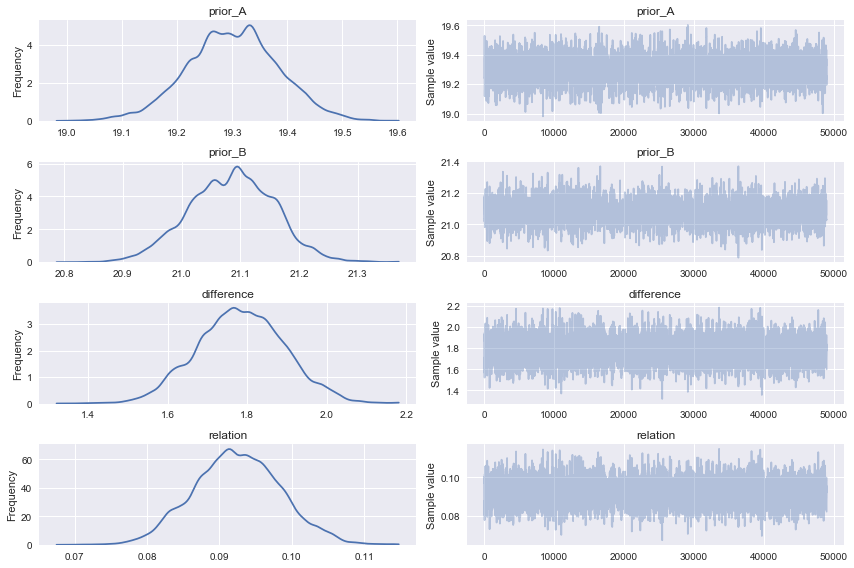

In [31]:
_ = pm.traceplot(trace[1000:], grid=True)


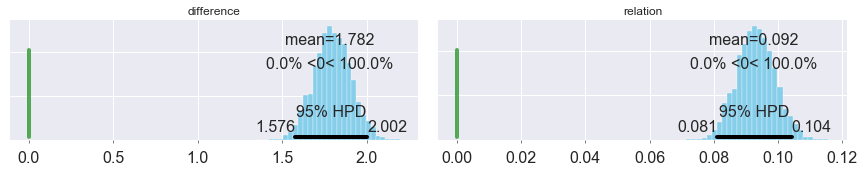

In [34]:
_ = pm.plot_posterior(trace[1000:], varnames=['difference', 'relation'], 
                      ref_val=0, color='#87ceeb')

>> Looking at the difference or relation histogram we see we have __100%__ confidence that B is better than A. If we have earlier defined a significance level of 5%, we can declare that B is a winner. If that was not the case, then, We need to either capture more data or stop the experiment and call it a draw

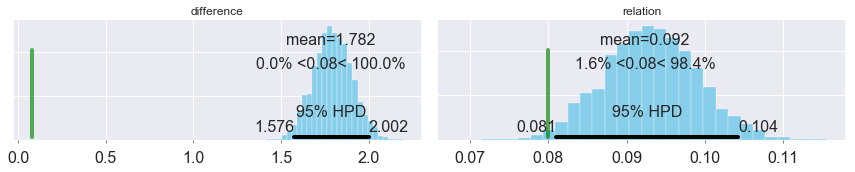

In [35]:
_ = pm.plot_posterior(trace[1000:], varnames=['difference', 'relation'], 
                      ref_val=.08, color='#87ceeb')

>> Looking at the difference or relation histogram we see we have __98.4%__ confidence that B is 8% or more better than A. If we have earlier defined a significance level of 5%, we can declare that B is a winner. If that was not the case, then, We need to either capture more data or stop the experiment and call it a draw

In [39]:
print (" Using mean only B is better A by {0:0.2f} %".format(100*(np.mean(B)/np.mean(A)-1)))

 Using mean only B is better A by 9.23 %
